In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
df = pd.read_csv('questao2.csv', delimiter=",")
df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [2]:
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [3]:
print(df.duplicated().value_counts())
df.drop_duplicates(inplace=True)
print(df)

False    48187
True        17
dtype: int64
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
0        None  288.28      0.0      0.0          40        Clouds   
1        None  289.36      0.0      0.0          75        Clouds   
2        None  289.58      0.0      0.0          90        Clouds   
3        None  290.13      0.0      0.0          90        Clouds   
4        None  291.14      0.0      0.0          75        Clouds   
...       ...     ...      ...      ...         ...           ...   
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0          90  Thunderstorm   
48202    None  282.09      0.0      0.0          90        Clouds   
48203    None  282.12      0.0      0.0          90        Clouds   

          weather_description            date_time  traffic_volume  
0            scattered clouds  2012-10-02 09:00:00         

In [4]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap = 'coolwarm')

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
temp,1.000000,0.009070,0.019756,0.101968,0.130161
rain_1h,0.009070,1.000000,0.000090,0.004818,0.004715
snow_1h,0.019756,0.000090,1.000000,0.027934,0.000736
clouds_all,0.101968,0.004818,0.027934,1.000000,0.067138
traffic_volume,0.130161,0.004715,0.000736,0.067138,1.000000


282.45

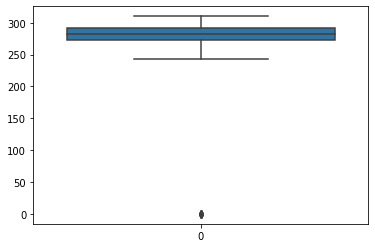

In [5]:
sns.boxplot(data=df["temp"])
df["temp"].median()

In [6]:
mediana = df["temp"].median()
for index, row in df.iterrows():
    if row['temp'] < 50:
        print(row['temp'])
        



0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [7]:
mediana = df["temp"].median()
df['temp'].replace(to_replace = 0.0, value = mediana, inplace=True)

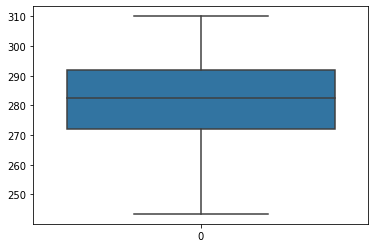

In [8]:
sns.boxplot(data=df["temp"])

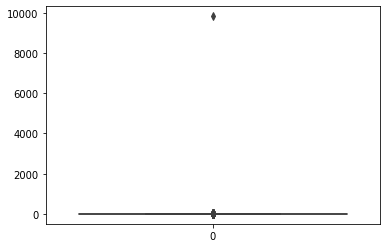

In [9]:
sns.boxplot(data=df["rain_1h"])


In [10]:
mediana = df["rain_1h"].median()
for index, row in df.iterrows():
    if row['rain_1h'] > 8000:
        print(row['rain_1h'])

9831.3


In [11]:
mediana = df["rain_1h"].median()
df['rain_1h'].replace(to_replace = 9831.3, value = mediana, inplace=True)

In [12]:
print(df['holiday'].value_counts())
print(df['weather_main'].value_counts())
print(df['weather_description'].value_counts())

None                         48126
Labor Day                        7
Christmas Day                    6
Thanksgiving Day                 6
New Years Day                    6
Martin Luther King Jr Day        6
Washingtons Birthday             5
Columbus Day                     5
State Fair                       5
Independence Day                 5
Veterans Day                     5
Memorial Day                     5
Name: holiday, dtype: int64
Clouds          15158
Clear           13384
Mist             5949
Rain             5672
Snow             2875
Drizzle          1820
Haze             1360
Thunderstorm     1033
Fog               912
Smoke              20
Squall              4
Name: weather_main, dtype: int64
sky is clear                           11659
mist                                    5949
overcast clouds                         5079
broken clouds                           4663
scattered clouds                        3460
light rain                              3372
few clo

In [13]:
for i in df['holiday']:
    df['holiday'].replace(to_replace = 'None', value = 0, inplace=True)
    df['holiday'].replace(to_replace = 'Labor Day', value = 1, inplace=True)
    df['holiday'].replace(to_replace = 'Martin Luther King Jr Day', value = 2, inplace=True)
    df['holiday'].replace(to_replace = 'Christmas Day', value = 3, inplace=True)
    df['holiday'].replace(to_replace = 'Thanksgiving Day', value = 4, inplace=True)
    df['holiday'].replace(to_replace = 'New Years Day', value = 5, inplace=True)
    df['holiday'].replace(to_replace = 'Washingtons Birthday', value = 6, inplace=True)
    df['holiday'].replace(to_replace = 'Memorial Day', value = 7, inplace=True)
    df['holiday'].replace(to_replace = 'Independence Day', value = 8, inplace=True)
    df['holiday'].replace(to_replace = 'State Fair', value = 9, inplace=True)
    df['holiday'].replace(to_replace = 'Columbus Day', value = 10, inplace=True)
    df['holiday'].replace(to_replace = 'Veterans Day', value = 11, inplace=True)
    
 

In [14]:
for i in df['weather_main']:
    df['weather_main'].replace(to_replace = 'Clouds', value = 0, inplace=True)
    df['weather_main'].replace(to_replace = 'Clear', value = 1, inplace=True)
    df['weather_main'].replace(to_replace = 'Mist', value = 2, inplace=True)
    df['weather_main'].replace(to_replace = 'Rain', value = 3, inplace=True)
    df['weather_main'].replace(to_replace = 'Snow', value = 4, inplace=True)
    df['weather_main'].replace(to_replace = 'Drizzle', value = 5, inplace=True)
    df['weather_main'].replace(to_replace = 'Haze', value = 6, inplace=True)
    df['weather_main'].replace(to_replace = 'Thunderstorm', value = 7, inplace=True)
    df['weather_main'].replace(to_replace = 'Fog', value = 8, inplace=True)
    df['weather_main'].replace(to_replace = 'Smoke', value = 9, inplace=True)
    df['weather_main'].replace(to_replace = 'Squall', value = 10, inplace=True)
    


In [15]:

for i in df['weather_description']:
    df['weather_description'].replace(to_replace = 'sky is clear', value = 0, inplace=True)
    df['weather_description'].replace(to_replace = 'mist', value = 1, inplace=True)
    df['weather_description'].replace(to_replace = 'overcast clouds', value = 2, inplace=True)
    df['weather_description'].replace(to_replace = 'broken clouds', value = 3, inplace=True)
    df['weather_description'].replace(to_replace = 'scattered clouds', value = 4, inplace=True)
    df['weather_description'].replace(to_replace = 'light rain', value = 5, inplace=True)
    df['weather_description'].replace(to_replace = 'few clouds', value = 6, inplace=True)
    df['weather_description'].replace(to_replace = 'light snow', value = 7, inplace=True)
    df['weather_description'].replace(to_replace = 'Sky is Clear', value = 8, inplace=True)
    df['weather_description'].replace(to_replace = 'moderate rain', value = 9, inplace=True)
    df['weather_description'].replace(to_replace = 'haze', value = 10, inplace=True)
    df['weather_description'].replace(to_replace = 'light intensity drizzle', value = 11, inplace=True)
    df['weather_description'].replace(to_replace = 'fog', value = 12, inplace=True)
    df['weather_description'].replace(to_replace = 'proximity thunderstorm', value = 13, inplace=True)
    df['weather_description'].replace(to_replace = 'drizzle', value = 14, inplace=True)
    df['weather_description'].replace(to_replace = 'heavy snow', value = 15, inplace=True)
    df['weather_description'].replace(to_replace = 'heavy intensity rain', value = 16, inplace=True)
    df['weather_description'].replace(to_replace = 'snow', value = 17, inplace=True)
    df['weather_description'].replace(to_replace = 'proximity shower rain', value = 18, inplace=True)
    df['weather_description'].replace(to_replace = 'thunderstorm', value = 19, inplace=True)
    df['weather_description'].replace(to_replace = 'heavy intensity drizzle', value = 20, inplace=True)
    df['weather_description'].replace(to_replace = 'thunderstorm with heavy rain', value = 21, inplace=True)
    df['weather_description'].replace(to_replace = 'thunderstorm with light rain', value = 22, inplace=True)
    df['weather_description'].replace(to_replace = 'proximity thunderstorm with rain', value = 23, inplace=True)
    df['weather_description'].replace(to_replace = 'thunderstorm with rain', value = 24, inplace=True)
    df['weather_description'].replace(to_replace = 'smoke', value = 25, inplace=True)
    df['weather_description'].replace(to_replace = 'very heavy rain', value = 26, inplace=True)
    df['weather_description'].replace(to_replace = 'thunderstorm with light drizzle', value = 27, inplace=True)
    df['weather_description'].replace(to_replace = 'proximity thunderstorm with drizzle', value = 28, inplace=True)
    df['weather_description'].replace(to_replace = 'light intensity shower rain', value = 29, inplace=True)
    df['weather_description'].replace(to_replace = 'light shower snow', value = 30, inplace=True)
    df['weather_description'].replace(to_replace = 'light rain and snow', value = 31, inplace=True)
    df['weather_description'].replace(to_replace = 'shower drizzle', value = 32, inplace=True)
    df['weather_description'].replace(to_replace = 'SQUALLS', value = 33, inplace=True)
    df['weather_description'].replace(to_replace = 'sleet', value = 34, inplace=True)
    df['weather_description'].replace(to_replace = 'freezing rain', value = 35, inplace=True)
    df['weather_description'].replace(to_replace = 'thunderstorm with drizzle', value = 36, inplace=True)
    df['weather_description'].replace(to_replace = 'shower snow', value = 37, inplace=True)

In [16]:
print(df['holiday'].value_counts())
print(df['weather_main'].value_counts())
print(df['weather_description'].value_counts())

0     48126
1         7
5         6
4         6
3         6
2         6
11        5
10        5
9         5
8         5
7         5
6         5
Name: holiday, dtype: int64
0     15158
1     13384
2      5949
3      5672
4      2875
5      1820
6      1360
7      1033
8       912
9        20
10        4
Name: weather_main, dtype: int64
0     11659
1      5949
2      5079
3      4663
4      3460
5      3372
6      1956
7      1945
8      1725
9      1664
10     1360
11     1099
12      912
13      673
14      651
15      616
16      467
17      293
18      136
19      124
20       64
21       63
22       54
23       52
24       37
25       20
26       18
27       15
28       13
29       13
30       11
32        6
31        6
33        4
34        3
36        2
35        2
37        1
Name: weather_description, dtype: int64


In [17]:


#NORMALIZACAO
col = ['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_description', 'weather_main', 'holiday','traffic_volume' ]
df_numeric = df[col]
# Normalize all of the numeric columns
df_normalized = (df_numeric - df_numeric.mean()) / df_numeric.std()
dfbu = df
df = df_normalized


In [18]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X = df[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_description', 'weather_main', 'holiday']].values
y = df['traffic_volume'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
y_pred = regressor.predict(X_test)
mse = (((y_pred - y_test) ** 2).sum()) / len(y_pred)
mse

0.9650049503192444

In [20]:
from sklearn.preprocessing import PolynomialFeatures
X_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:

y_pred = model.predict(X_test)
mse = (((y_pred - y_test) ** 2).sum()) / len(y_pred)
mse

0.9571187731696689

In [22]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)
for result in kf.split(df):
    train = df.iloc[result[0]]
    test =  df.iloc[result[1]]
    X_train = train[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_description', 'weather_main', 'holiday']].values
    y_train = train['traffic_volume'].values
    X_test = test[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_description', 'weather_main', 'holiday']].values
    y_test = test['traffic_volume'].values
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = (((y_pred - y_test) ** 2).sum()) / len(y_pred)
    print(mse)

0.9623098078824827
0.9656256237591683
0.9542628767187414
0.9594479096968328
0.956673489091355
0.9856812621579275
0.9520967416697148
0.9672976848427485
0.9474721284682888
0.9862841807425324


In [23]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 2)
for result in kf.split(df):
    train = df.iloc[result[0]]
    test =  df.iloc[result[1]]
    X_train = train[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_description', 'weather_main', 'holiday']].values
    y_train = train['traffic_volume'].values
    X_test = test[['temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_description', 'weather_main', 'holiday']].values
    y_test = test['traffic_volume'].values
    X_train_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
    X_test_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
    regressor = LinearRegression()  
    regressor.fit(X_train_, y_train)
    y_pred = regressor.predict(X_test_)
    mse = (((y_pred - y_test) ** 2).sum()) / len(y_pred)
    print(mse)

0.9476167022484642
0.9547193543878264
0.9423320702378434
0.9493070290675358
0.9490648017891293
0.9711930591991383
0.9377106054444985
0.9590007931738508
0.9366447947696415
0.9760601056362037
